In [1]:
# import packages
import h5py # read h5

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib import rc
from cycler import cycler

import numpy as np
import pandas as pd

from merge_h5_files import merge_preserve_time
import os
import glob

# download and install Dr. Jin's python package, click the url below for more details
# !git clone https://github.com/jinwar/jin_pylib

from jin_pylib import gjsignal
from jin_pylib import Data2D_XT


# merge dataset

In [2]:
# Read h5 files
# f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 3 (refrac)/Neubrex_DSS_strain/Zgabay A14H - refrac - strain change.h5','r')
# f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/stage6/sensor_2019-04-01T180047Z.h5','r')
f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/stage22/sensor_2019-04-07T033627Z.h5','r')
print(list(f1.keys()))
# 继续进入下一层
data_group = f1['Acquisition']['Raw[0]']['RawData']
print(data_group)
# print(list(data_group.keys()))
# 继续进入下一层
# data_group2 = data_group['Raw[0]']
# print(list(data_group2.keys()))
# 继续进入下一层
# RawData = data_group2['RawData']
# print(RawData)
# RawDataTime = data_group2['RawDataTime']
# print(RawDataTime)

['Acquisition']
<HDF5 dataset "RawData": shape (6100, 30), type "<i4">


In [4]:

# folder  = r"C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/stage22"
# folder  = r"C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/Anadarko_B2H_(B4H)_CWC/Input/0.1 Hz Diff"
folder  = r"C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/Anadarko_B1H_(B4H)_CWC_Stages_8_-_33\Input\FBE 0.1 Hz Diff"


pattern = "sensor_*.h5"  # 或者 "*.h5"
out_h5  = os.path.join(folder, "merged_B1H_(B4H).h5")

files = sorted(glob.glob(os.path.join(folder, pattern)))
assert files, f"在 {folder} 未找到匹配 {pattern} 的文件。"


# Merge HFTS2 h5 files while preserving time information
# （depth, time）no need to transpose
merge_preserve_time(files, out_h5,
                    expected_depth=6100,
                    expected_T_per_file=30,
                    sort_by_time=True,
                    compression=None)  # 需要压缩可设 'gzip', compression_opts=4


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\fengxiang.mao\AppData\Local\Temp\ipykernel_2412\1328504751.py", line 15, in <module>
    merge_preserve_time(files, out_h5,
  File "c:\Users\fengxiang.mao\Desktop\Github\plot-for-research-\merge_h5_files.py", line 127, in merge_preserve_time
    dset[:, t0_off:t0_off + T_each] = raw
    ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "h5py\\_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py\\_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "c:\ProgramData\anaconda3\Lib\site-packages\h5py\_hl\dataset.py", line 999, in __setitem__
    self.id.write(mspace, fspace, val, mtype, dxpl=self._dxpl)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Li

In [5]:
for f in files:
    with h5py.File(f, "r") as h:
        raw = h["Acquisition"]["Raw[0]"]["RawData"][...]
        print(os.path.basename(f), raw.shape)


sensor_2019-03-21T175659Z.h5 (6100, 30)
sensor_2019-03-21T180159Z.h5 (6100, 30)
sensor_2019-03-21T180659Z.h5 (6100, 30)
sensor_2019-03-21T181159Z.h5 (6100, 30)
sensor_2019-03-21T181659Z.h5 (6100, 30)
sensor_2019-03-21T182159Z.h5 (6100, 30)
sensor_2019-03-21T182659Z.h5 (6100, 30)
sensor_2019-03-21T183159Z.h5 (6100, 30)
sensor_2019-03-21T183659Z.h5 (6100, 30)
sensor_2019-03-21T184159Z.h5 (6100, 30)
sensor_2019-03-21T184659Z.h5 (6100, 30)
sensor_2019-03-21T185159Z.h5 (6100, 30)
sensor_2019-03-21T185659Z.h5 (6100, 30)
sensor_2019-03-21T190159Z.h5 (6100, 30)
sensor_2019-03-21T190659Z.h5 (6100, 30)
sensor_2019-03-21T191159Z.h5 (6100, 30)
sensor_2019-03-21T191659Z.h5 (6100, 30)
sensor_2019-03-21T192159Z.h5 (6100, 30)
sensor_2019-03-21T192659Z.h5 (6100, 30)
sensor_2019-03-21T193159Z.h5 (6100, 30)
sensor_2019-03-21T193659Z.h5 (6100, 30)
sensor_2019-03-21T194159Z.h5 (6100, 30)
sensor_2019-03-21T194659Z.h5 (6100, 30)
sensor_2019-03-21T195159Z.h5 (6100, 30)
sensor_2019-03-21T195659Z.h5 (6100, 30)


# overall


In [3]:
# import packages
import h5py # read h5

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib import rc
from cycler import cycler
from depth_and_time_cut import subset_dstrain_by_time_ranges, subset_dstrain_by_md_ranges
from matplotlib.colors import TwoSlopeNorm
from matplotlib.ticker import MultipleLocator, FuncFormatter, MaxNLocator, ScalarFormatter, FixedLocator, LogFormatter

import numpy as np
import pandas as pd


# download and install Dr. Jin's python package, click the url below for more details
# !git clone https://github.com/jinwar/jin_pylib

from jin_pylib import gjsignal
from jin_pylib import Data2D_XT


In [4]:
# Read h5 files
# f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 3 (refrac)/Neubrex_DSS_strain/Zgabay A14H - refrac - strain change.h5','r')
# merged_data = h5py.File('C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/stage6/merged_stage6_preserve_time.h5','r')
merged_data = h5py.File('C:/Users/fengxiang.mao/Desktop/HFTS2_dataset//Anadarko_B1H_(B4H)_CWC_Stages_8_-_33/Input/FBE 0.1 Hz Diff/merged_B1H_(B4H).h5','r')

print(list(merged_data.keys()))

['Acquisition']


In [5]:
# Assign variables
pchange = (merged_data['Acquisition']['Raw[0]']['RawData'])
# depth = (f1['depth'])
time_relative = (merged_data['Acquisition']['Raw[0]']['RawDataTime'])

# use panda package
print(pd.DataFrame(pchange))
print(pd.DataFrame(time_relative))

      0      1      2      3      4      5      6      7      8      \
0         0      0      0      0      0      0      0      0      0   
1         0      0      0      0      0      0      0      0      0   
2         0      0      0      0      0      0      0      0      0   
3         0      0      0      0      0      0      0      0      0   
4         0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...   
6095      0      0      0      0      0      0      0      0      0   
6096      0      0      0      0      0      0      0      0      0   
6097      0      0      0      0      0      0      0      0      0   
6098      0      0      0      0      0      0      0      0      0   
6099      0      0      0      0      0      0      0      0      0   

          9      ...   60350   60351   60352   60353   60354   60355   60356  \
0     -11658750  ...  -21386   16742    1990   97759   46607 -11217

In [ ]:
# start = pd.Timestamp("2019-03-30 18:00:28")
# end   = pd.Timestamp("2019-04-09 16:52:43")
# realtime = pd.to_datetime(time_relative, unit='us')
# mask = (realtime >= start) & (realtime <= end)
# t_cut = realtime[mask]

In [6]:
# convert the strain data to numpy array
pchange = np.array(pchange)
print(pchange.shape)


# convert optical phase change into strain change
def phase_to_strain(arr):
    probe_wave_length = 1550e-9
    refractive_index = 1.4682
    scalar_multi_factor = 0.78
    gauge_length = 7.1467
    stored_value = 104300.4       #stored data unit rad/10430

    return probe_wave_length/(4*np.pi*refractive_index*scalar_multi_factor*gauge_length)*(arr/stored_value)

dstrain = phase_to_strain(pchange)

print(dstrain)

(6100, 60360)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.80258810e-09
   1.75907268e-09 -1.58018883e-09]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -7.45734688e-10
   3.40486189e-09 -1.50567316e-08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.11039476e-08
   1.26337079e-08  2.09477611e-08]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  7.78375933e-09
  -1.21350584e-08  4.00133404e-09]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.46102562e-09
   3.14274936e-09 -1.21506638e-08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.73971045e-10
  -6.89815424e-10 -1.00856968e-10]]


In [7]:
# Parameters
sp_resolution = 1.0209523439407349    # Spatial resolution, m
time_resolution = 10     # Time resolution, s
optical_dis_top = 327.20279999999997  # Optical distance to top, m
optical_dis_end = 6198.7121136000005  # Optical distance to bottom, m
physical_dis_top = -4.440892098500626E-15      # Physical distance to top, m
physical_dis_end = 5840.0656312500005  # Physical distance to bottom, m
kelly_bushing = 7.9248   # Kelly bushing height, m


# Convert meters to feet
def meters_to_feet(meters):
    return meters * 3.28084

sp_resolution_ft = meters_to_feet(sp_resolution)
optical_dis_top_ft = meters_to_feet(optical_dis_top)
optical_dis_end_ft = meters_to_feet(optical_dis_end)
physical_dis_top_ft = meters_to_feet(physical_dis_top)
physical_dis_end_ft = meters_to_feet(physical_dis_end)
kelly_bushing_ft = meters_to_feet(kelly_bushing)


# Compute MD (measured depth) for a range of channel counts in a vectorized way
min_channels = 0
max_channels = 6099
channels = np.arange(min_channels, max_channels + 1)
fiber_MD = channels * sp_resolution_ft 
MD = (fiber_MD - optical_dis_top_ft) * (physical_dis_end_ft - physical_dis_top_ft) / (optical_dis_end_ft - optical_dis_top_ft)  + kelly_bushing_ft

print(MD)
print(MD.shape)

[-1041.75112088 -1038.4194776  -1035.08783432 ... 19271.27796929
 19274.60961257 19277.94125585]
(6100,)


In [8]:

ranges = [(11000, 19000)]
# ranges = [(13500, 14500)]

# 已有：dstrain.shape == (N_ch, N_t)、MD.shape == (N_ch,)
# ranges 用 MD（ft）指定

# A) 推荐：严格按 MD 边界插值（边界精确）
# data_sub, md_sub, meta = subset_dstrain_by_md_ranges(
#     dstrain, MD, ranges,
#     method="interp",
#     keep_gaps=True,   # 区间之间空白隔开，瀑布图更清晰
#     gap_rows=2,
# )

# B) 若追求速度且能接受边界落到最近 channel：
data_sub, md_sub, meta = subset_dstrain_by_md_ranges(dstrain, MD, ranges, method="nearest_channel", keep_gaps=True)


In [9]:
print(data_sub.shape)
print(md_sub.shape)
print(data_sub)


(2401, 60360)
(2401,)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -6.21325162e-12
   3.19332234e-11  7.22471118e-11]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.22222119e-10
  -9.71145677e-10 -1.17199265e-09]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.30333790e-10
   1.12416506e-10  6.40109411e-11]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.89952106e-09
   1.15609828e-09 -2.26321302e-09]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.18759802e-09
   4.18469721e-09  6.21816442e-09]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -8.39077957e-10
  -4.01260459e-10 -2.64424429e-11]]


In [10]:
t_intrvl = 10  # time interval in seconds
t_axis =  t_intrvl * np.arange(dstrain.shape[-1])          # array([1, 146, 291, ...])
t_axis = t_axis.tolist() 
print(t_axis)
print(type(t_axis))
start_time = datetime.datetime(2019,3,21,17,56,59)

# start_time = datetime.datetime(2019,4,7,3,31,27)
# start_time = datetime.datetime(2019,4,7,1,51,27)
# print(start_time)


[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 

In [11]:

# 例1：用“相对秒”指定两段
# ranges_t = [(0, 3600), (7200, 7800)]   # [0, 1h] 和 [2h, 2h10m]

# 例2：用“绝对时间”指定（需要 start_time）
from datetime import timedelta
ranges_t = [(start_time + timedelta(minutes=0), datetime.datetime(2019,3,28,17,44,48))]
# ranges_t = [(start_time + timedelta(minutes=0), datetime.datetime(2019,4,7,10,6,27))]    #这个时间是文件开始的时间，里面还有29个intervals

# ranges_t = [(start_time + timedelta(minutes=5), start_time + timedelta(minutes=30)),
#             (start_time + timedelta(hours=2),  start_time + timedelta(hours=2, minutes=10))]

# A) 边界精确（推荐）
# data_tsub, t_sub, tmeta = subset_dstrain_by_time_ranges(
#     data_sub, t_axis, ranges_t,
#     start_time=start_time,
#     method="interp",
#     keep_gaps=True,
#     gap_cols=2,
#     include_endpoints=True
# )

# B) 速度优先（不插值）
data_tsub, t_sub, tmeta = subset_dstrain_by_time_ranges(
    data_sub, t_axis, ranges_t, start_time=start_time, method="nearest", keep_gaps=True
)


In [12]:
import numpy as np
import pandas as pd

# t：把你的 t_axis 统一成“相对秒”的 ndarray
t = np.asarray(t_axis, dtype=float)
dt = float(np.median(np.diff(t)))  # 估计采样间隔，应≈10

# 把你传给函数的 ranges_t（若是绝对时间）也转为“相对秒”
def to_rel_s(r, start_time):
    lo, hi = r
    lo = (pd.to_datetime(lo) - pd.to_datetime(start_time)).total_seconds()
    hi = (pd.to_datetime(hi) - pd.to_datetime(start_time)).total_seconds()
    return lo, hi

# 如果你的 ranges_t 就是相对秒，这步就不用
lo, hi = to_rel_s(ranges_t[0], start_time)

print("t[0], t[-1], dt =", t[0], t[-1], dt)
print("你给的区间(秒)   =", lo, hi)
print("左侧被裁掉列数 =", np.sum(t < lo))
print("右侧被裁掉列数 =", np.sum(t > hi))


t[0], t[-1], dt = 0.0 603590.0 10.0
你给的区间(秒)   = 0.0 604069.0
左侧被裁掉列数 = 0
右侧被裁掉列数 = 0


In [13]:
print(data_tsub.shape)

(2401, 60360)


In [14]:
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view

def _rolling_median_time(x, win):
    """沿时间轴滚动中位数，忽略 NaN；边界用 edge 填充。x: (n_ch, n_t)"""
    if win < 3 or win % 2 == 0:
        raise ValueError("win 应是 >=3 的奇数")
    pad = win // 2
    xp = np.pad(x, ((0,0),(pad,pad)), mode='edge')
    # 关键修正：window_shape
    w = sliding_window_view(xp, window_shape=win, axis=1)  # (n_ch, n_t, win)
    med = np.nanmedian(w, axis=-1)
    return med

def _rolling_mean_time_nanaware(x, win):
    """沿时间轴移动平均（对 NaN 做权重归一），x: (n_ch, n_t)"""
    if win < 3 or win % 2 == 0:
        raise ValueError("win 应是 >=3 的奇数")
    kernel = np.ones(win, dtype=float)
    pad = win // 2
    x0 = np.pad(np.where(np.isfinite(x), x, 0.0), ((0,0),(pad,pad)), mode='edge')
    w0 = np.pad(np.where(np.isfinite(x), 1.0, 0.0), ((0,0),(pad,pad)), mode='edge')
    # 逐通道一维卷积
    val = np.apply_along_axis(lambda m: np.convolve(m, kernel, mode='valid'), 1, x0)
    cnt = np.apply_along_axis(lambda m: np.convolve(m, kernel, mode='valid'), 1, w0)
    out = val / np.maximum(cnt, 1e-12)
    # 原位是 NaN 的位置保持 NaN（避免填补 gap）
    out[~np.isfinite(x)] = np.nan
    return out

def _median_depth_nanaware(x, win=3):
    """沿深度（通道轴=0）做极轻的中值滤波，去椒盐点；对 NaN 友好。"""
    if win < 3 or win % 2 == 0:
        raise ValueError("win 应是 >=3 的奇数")
    pad = win // 2
    xp = np.pad(x, ((pad,pad),(0,0)), mode='edge')
    # 关键修正：window_shape，且不要 moveaxis
    w = sliding_window_view(xp, window_shape=win, axis=0)  # (n_ch, n_t, win)
    med = np.nanmedian(w, axis=-1)                         # 沿窗口轴取中位
    med[~np.isfinite(x)] = np.nan
    return med

def despike_mad_time(x, win=5, k=6.0):
    """
    MAD 去尖峰（沿时间轴）。win:奇数窗口；k: 阈值倍数（常用 5~8）。
    只替换超过 k*MAD 的离群点为局部中位数。
    """
    med = _rolling_median_time(x, win)
    dev = x - med
    mad = _rolling_median_time(np.abs(dev), win)
    sigma = 1.4826 * mad
    mask = np.isfinite(x) & np.isfinite(sigma) & (np.abs(dev) > k * sigma)
    out = x.copy()
    out[mask] = med[mask]
    return out

def denoise_pipeline(data_mu_eps,
                     t_win_despike=5,    # 5*10s=50s 局部去尖峰
                     mad_k=6.0,
                     t_win_smooth=7,     # 7*10s=70s 轻平滑
                     use_depth_median=True,
                     depth_win=3):
    """
    data_mu_eps: (n_ch, n_t) 单位 μɛ，含 NaN 间隔（来自 keep_gaps）。
    返回：去噪后的 (n_ch, n_t)
    """
    # 记录哪些列/行是 gap（全 NaN），用于保护不跨 gap 平滑
    col_gap = np.all(~np.isfinite(data_mu_eps), axis=0)
    row_gap = np.all(~np.isfinite(data_mu_eps), axis=1)

    y = data_mu_eps.copy()
    # 1) MAD 去尖峰（时间轴）
    y = despike_mad_time(y, win=t_win_despike, k=mad_k)
    # 2) 移动平均轻平滑（时间轴）
    y = _rolling_mean_time_nanaware(y, win=t_win_smooth)
    # 3) 可选：沿深度 3 点中值（极轻）
    if use_depth_median:
        y = _median_depth_nanaware(y, win=depth_win)
    # 恢复 gap：保持 gap 位置仍为 NaN
    y[:, col_gap] = np.nan
    y[row_gap, :] = np.nan
    return y


In [15]:
# 2) 去噪流水线
data_clean = denoise_pipeline(
    data_tsub,
    t_win_despike=5,   # 50 s 局部中位去尖峰
    mad_k=6.0,
    t_win_smooth=7,    # 70 s 轻平滑；若你想更锐利，用 5
    use_depth_median=True,
    depth_win=3
)

## Waterfall plot

In [16]:
# Figure format
rc = {'axes.facecolor':'white',
      'figure.figsize': (12, 6),
      'savefig.dpi': 600,
#       'axes.grid' : False,
      'axes.edgecolor' : '0.15',
      'font.family':'Times New Roman',
      'font.serif': ['Times New Roman', 'Times', 'STIXGeneral'],  # 备选

      # —— 数学字体（$...$ 内）——
      'mathtext.fontset': 'stix',     # 关键：让 μ、ε 等用 STIX（Times 风格）
      'axes.unicode_minus': False,    # 让负号显示为正常的连字符
      
      'axes.labelsize': 36,         # X、Y 轴标题字体
      'axes.labelweight': 'bold',   # X、Y 轴标题加粗
      'xtick.labelsize': 36,        # X轴刻度文字
      'ytick.labelsize': 36,        # Y轴刻度文字
      'legend.fontsize': 36,       # 图例字体

      # 线宽与颜色顺序
      'lines.linewidth': 2.25,      # 所有线条默认 2.25 pt
      'axes.prop_cycle': cycler('color', list(('k', 'r', 'b', 'g', 'm', 'c', 'y'))),

      # 刻度朝外 & 粗细
      'xtick.direction': 'out',
      'ytick.direction': 'out',
      'xtick.major.size': 6,
      'ytick.major.size': 6,
      'xtick.major.width': 2.0,
      'ytick.major.width': 2.0,

      # 坐标轴（内框）线宽
      'axes.linewidth': 4.0,
      } 
# lack of font size
plt.rcParams.update(rc)

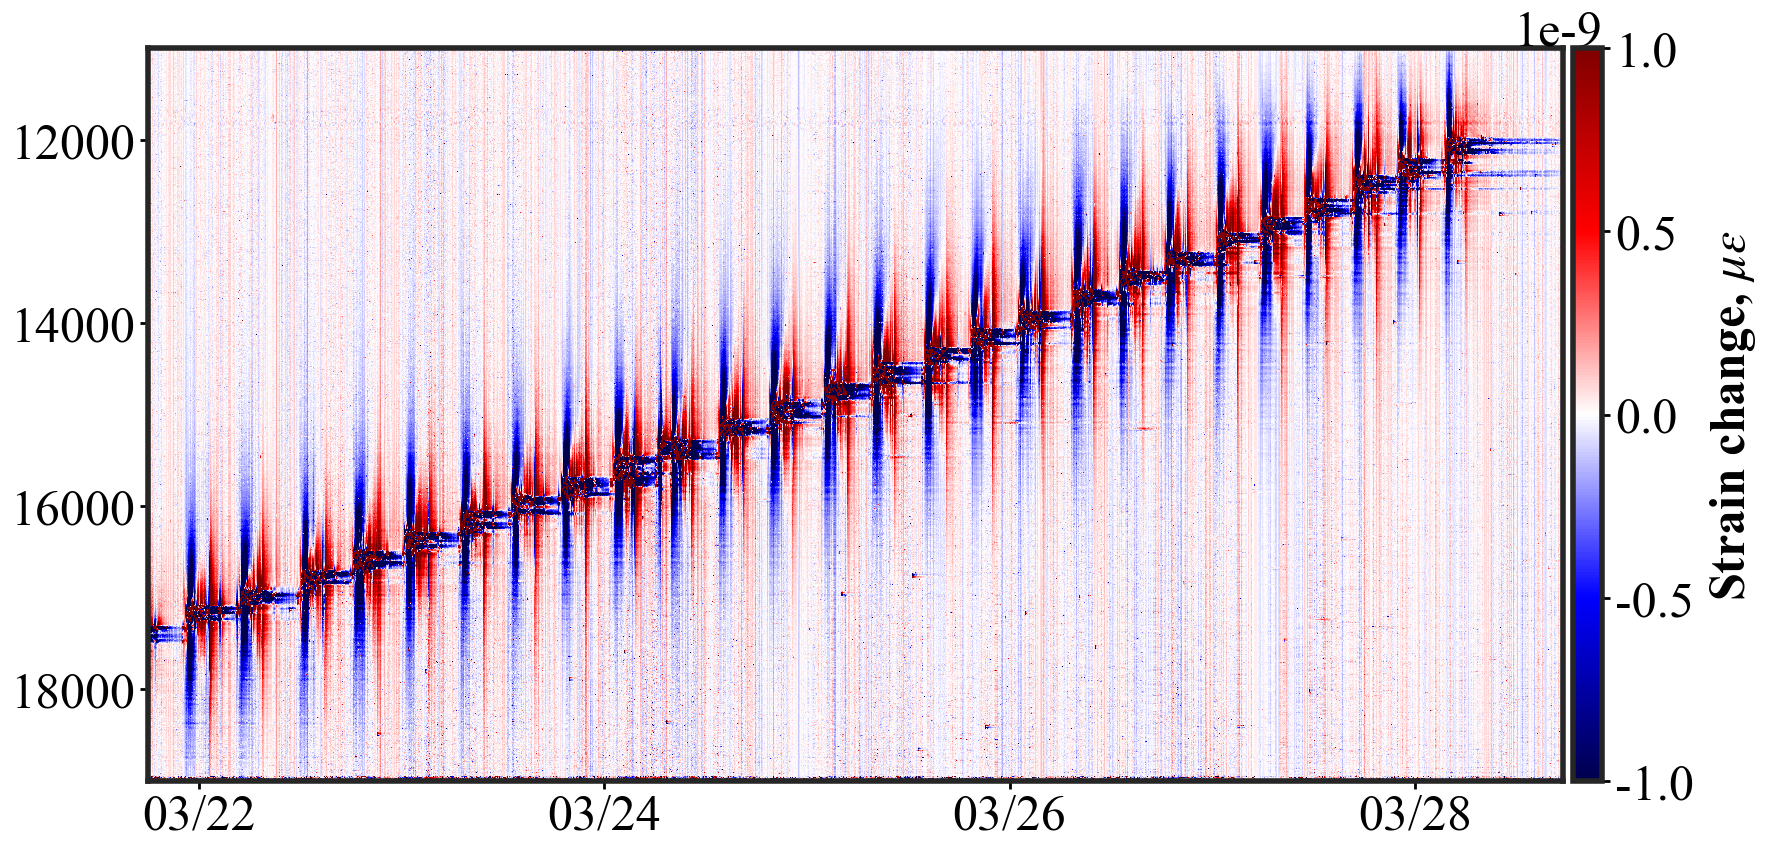

In [19]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# 画瀑布图（对接你的 Data2D_XT）
# cmap = plt.get_cmap('jet').copy()
# cmap.set_bad('white')  # NaN 分隔带显示白色
DASdata = Data2D_XT.Data2D()
DASdata.data = data_clean                 # (N_ch, M_t)
DASdata.taxis = t_sub                   # 仍然是“相对秒”
DASdata.daxis = md_sub                  # 现在是 MD（ft），含 NaN 分隔也 OK
DASdata.start_time = start_time       # 搭配 use_timestamp=True 才能显示绝对时间刻度

#adjust the size

fig, ax = plt.subplots(figsize=(16, 8), layout='constrained')  # 宽 12 英寸，高 6 英寸

# DASdata.plot_waterfall(timescale='second',use_timestamp=True,timefmt = '%m/%d\n%H:%M:%S.{ms}')
DASdata.plot_waterfall(timescale='second', use_timestamp=True, cmap=plt.get_cmap('seismic'), xtickN=5, interpolation='nearest')#interpolation='nearest' 或 'bilinear' #antialiased

ax = plt.gca()
im = ax.images[-1]
im.set_norm(TwoSlopeNorm(vmin=-1e-9, vcenter=0, vmax=1e-9))  # 以 0 为中心
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%",pad=0.1)  # 调整 3.5% 为你想要的宽度
cbar = fig.colorbar(im,cax=cax, ax=ax) # pad 调整颜色条与图的距离pad 数值越大越远（相对于轴宽度的比例）

cbar.set_label(r'Strain change, $\mu\varepsilon$', rotation=90, labelpad=10)
# plt.clim(-1e-8, 1e-8)
cbar.set_ticks([-1e-9, -0.5e-9, 0, 0.5e-9, 1e-9])                 # 或 cbar.ax.yaxis.set_major_locator(FixedLocator([...]))
# cbar.set_ticklabels([r'$-1$', r'$-0.5$', r'$0$', r'$0.5$', r'$1$'])


# ax.set_ylabel("Measured Depth (ft)", fontweight='bold')
# ax.set_xlabel("Date",     fontweight='bold')

#S6
# # X 轴

# ax.set_xticks([
#     datetime.datetime(2019,3,28,0,0,0) + timedelta(days=i *2 ) for i in range(5)
# ])                     # 位置（数据坐标）

ticks = [
    datetime.datetime(2019,3,22,0,0,0) + timedelta(days=i*2) for i in range(4)
]

# ticks = [
#     datetime.datetime(2019,4,5,21,0,0),       # 自定义时间点
#     *[
#         datetime.datetime(2019,3,30,0,0,0) + timedelta(days=i*2)
#         for i in range(6)
#     ]
# ]

ax.set_xticks(ticks)

# 只显示年月日
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%d/%y'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))


# ax.set_xticklabels(['2019-04-01','2019-04-01'])     # 文本（与上面位置一一对应）

# ax.set_yticks([17400, 17600, 17800,18000])                     # 位置（数据坐标）
# ax.set_yticklabels(['17400', '17600', '17800', '18000'])     # 文本（与上面位置一一对应）


# S22
# ax.set_xticks([start_time + timedelta(minutes=150), datetime.datetime(2019,4,1,17,6,27)+ timedelta(minutes=40)])                     # 位置（数据坐标）
# ax.set_xticklabels(['2019-04-07','2019-04-07'])     # 文本（与上面位置一一对应）
# ax.set_xticklabels(['','']) 
# ax.set_yticks([13600, 13800, 14000, 14200, 14400])                     # 位置（数据坐标）
# ax.set_yticklabels(['13600', '13800', '14000', '14200', '14400'])     # 文本（与上面位置一一对应/）




# 均匀间隔
# ax.xaxis.set_major_locator(MultipleLocator(3600))     # 每 3600 秒一个大刻度
ax.yaxis.set_major_locator(MultipleLocator(2000))     # 每 2000 ft 一个大刻度

# # 控制刻度文本格式（自定义函数）
# ax.xaxis.set_major_formatter(FuncFormatter(lambda v, pos: f'{v/3600:.1f} h'))
# ax.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f'{v:.0f}'))






# plt.tight_layout()
plt.savefig('waterfall_HFTS2_B1H(B4H).png', dpi=600, bbox_inches='tight', pad_inches=0.05)
# plt.savefig('waterfall_HFTS2_S22.png')



# S6

## data pre_processing and axes calibration 

In [231]:
# import packages
import h5py # read h5

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib import rc
from cycler import cycler
from depth_and_time_cut import subset_dstrain_by_time_ranges, subset_dstrain_by_md_ranges
from matplotlib.colors import TwoSlopeNorm
from matplotlib.ticker import MultipleLocator, FuncFormatter, MaxNLocator, ScalarFormatter, FixedLocator, LogFormatter

import numpy as np
import pandas as pd


# download and install Dr. Jin's python package, click the url below for more details
# !git clone https://github.com/jinwar/jin_pylib

from jin_pylib import gjsignal
from jin_pylib import Data2D_XT


In [232]:
# Read h5 files
# f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 3 (refrac)/Neubrex_DSS_strain/Zgabay A14H - refrac - strain change.h5','r')
# merged_data = h5py.File('C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/stage6/merged_stage6_preserve_time.h5','r')
merged_data = h5py.File('C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/stage6/merged_stage6_preserve_time.h5','r')
print(list(merged_data.keys()))

['Acquisition']


In [233]:
# Assign variables
pchange = (merged_data['Acquisition']['Raw[0]']['RawData'])
# depth = (f1['depth'])
time_relative = (merged_data['Acquisition']['Raw[0]']['RawDataTime'])

# use panda package
print(pd.DataFrame(pchange))
print(pd.DataFrame(time_relative))

        0       1       2       3       4       5       6       7       8     \
0      -2953   -2580   -8633   13133  -17471  -50952   -5160   -9372  -27356   
1     -38452  -83629   92776   28933  -36660   19688  -23558   -3773    4614   
2     170796   98109  -17016   27394  108543   65053   31672   71126   44777   
3     414549  141402  -39769  176868  363481  222100  126043  217992  128663   
4     606105  241944 -154941  -88866  342204  257189  224281  373070  325640   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
6095 -186136  -32691    8720    1937   88566  184335    6386 -185189 -300235   
6096 -217258   22032  188394  -17187  -58971  108712  -87471 -257052   31129   
6097   26447 -148212  104515   88457   -6225   56758   76768    9467 -106000   
6098 -303778 -158940  386575  224340 -111798  -83379  -88561  147851  254396   
6099   55538   95133  -51723 -180810 -334355  117284  -23709 -393634 -101832   

        9     ...    2990    2991    29

In [234]:
start = pd.Timestamp("2019-04-07 03:31:27")
end   = pd.Timestamp("2019-04-07 09:00:27")
realtime = pd.to_datetime(time_relative, unit='us')
mask = (realtime >= start) & (realtime <= end)
t_cut = realtime[mask]

In [235]:
# convert the strain data to numpy array
pchange = np.array(pchange)
print(pchange.shape)


# convert optical phase change into strain change
def phase_to_strain(arr):
    probe_wave_length = 1550e-9
    refractive_index = 1.4682
    scalar_multi_factor = 0.78
    gauge_length = 7.1467
    stored_value = 104300.4       #stored data unit rad/10430

    return probe_wave_length/(4*np.pi*refractive_index*scalar_multi_factor*gauge_length)*(arr/stored_value)

dstrain = phase_to_strain(pchange)

print(dstrain)

(6100, 3000)
[[-4.26691442e-10 -3.72795097e-10 -1.24741863e-09 ...  2.87687999e-10
  -1.40621778e-09 -7.78245888e-10]
 [-5.55609189e-09 -1.20839074e-08  1.34055961e-08 ... -3.25747778e-09
  -2.14183788e-09  1.35376638e-09]
 [ 2.46790354e-08  1.41761838e-08 -2.45871371e-09 ... -7.22846803e-09
  -5.35091009e-09  1.77337761e-09]
 ...
 [ 3.82143873e-09 -2.14157779e-08  1.51018138e-08 ...  1.12088504e-08
   1.64323166e-08  5.75506043e-09]
 [-4.38941663e-08 -2.29659119e-08  5.58578545e-08 ... -1.16897272e-08
   3.07339214e-09 -9.74555741e-09]
 [ 8.02492019e-09  1.37461690e-08 -7.47367473e-09 ... -1.13777642e-08
  -2.03707956e-09  2.25272274e-08]]


In [236]:
# Parameters
sp_resolution = 1.0209523439407349    # Spatial resolution, m
time_resolution = 10     # Time resolution, s
optical_dis_top = 327.20279999999997  # Optical distance to top, m
optical_dis_end = 6198.7121136000005  # Optical distance to bottom, m
physical_dis_top = -4.440892098500626E-15      # Physical distance to top, m
physical_dis_end = 5840.0656312500005  # Physical distance to bottom, m
kelly_bushing = 7.9248   # Kelly bushing height, m


# Convert meters to feet
def meters_to_feet(meters):
    return meters * 3.28084

sp_resolution_ft = meters_to_feet(sp_resolution)
optical_dis_top_ft = meters_to_feet(optical_dis_top)
optical_dis_end_ft = meters_to_feet(optical_dis_end)
physical_dis_top_ft = meters_to_feet(physical_dis_top)
physical_dis_end_ft = meters_to_feet(physical_dis_end)
kelly_bushing_ft = meters_to_feet(kelly_bushing)


# Compute MD (measured depth) for a range of channel counts in a vectorized way
min_channels = 0
max_channels = 6099
channels = np.arange(min_channels, max_channels + 1)
fiber_MD = channels * sp_resolution_ft 
MD = (fiber_MD - optical_dis_top_ft) * (physical_dis_end_ft - physical_dis_top_ft) / (optical_dis_end_ft - optical_dis_top_ft)  + kelly_bushing_ft

print(MD)
print(MD.shape)

[-1041.75112088 -1038.4194776  -1035.08783432 ... 19271.27796929
 19274.60961257 19277.94125585]
(6100,)


In [237]:

ranges = [(17350, 18180)]
# ranges = [(13500, 14500)]

# 已有：dstrain.shape == (N_ch, N_t)、MD.shape == (N_ch,)
# ranges 用 MD（ft）指定

# A) 推荐：严格按 MD 边界插值（边界精确）
# data_sub, md_sub, meta = subset_dstrain_by_md_ranges(
#     dstrain, MD, ranges,
#     method="interp",
#     keep_gaps=True,   # 区间之间空白隔开，瀑布图更清晰
#     gap_rows=2,
# )

# B) 若追求速度且能接受边界落到最近 channel：
data_sub, md_sub, meta = subset_dstrain_by_md_ranges(dstrain, MD, ranges, method="nearest_channel", keep_gaps=True)


In [238]:
print(data_sub.shape)
print(md_sub.shape)
print(data_sub)


(249, 3000)
(249,)
[[ 1.48973545e-10  1.78739355e-10 -8.33731670e-11 ...  2.47374111e-10
   2.61968027e-10  2.29456827e-10]
 [-3.32336714e-12  1.97957086e-11  4.40707382e-11 ...  2.45206697e-10
   2.46940628e-10  2.42750296e-10]
 [ 2.54309834e-11  3.65570386e-11  4.17588306e-11 ...  2.75839473e-10
   2.17608301e-10  2.07927188e-10]
 ...
 [-1.87842491e-12  1.70503184e-11 -6.40109411e-11 ...  9.72446125e-11
   6.35774584e-12  2.97658101e-11]
 [-1.29322330e-10 -2.20498185e-10 -3.67015328e-11 ... -2.36970527e-11
  -1.58943646e-11 -3.68460270e-11]
 [-1.21953125e-10 -1.22820090e-10 -1.34668616e-10 ... -9.85450605e-11
   4.55156804e-11 -2.19631220e-11]]


In [239]:
t_intrvl = 10  # time interval in seconds
t_axis =  t_intrvl * np.arange(dstrain.shape[-1])          # array([1, 146, 291, ...])
t_axis = t_axis.tolist() 
print(t_axis)
print(type(t_axis))
start_time = datetime.datetime(2019,4,1,18,00,47)

# start_time = datetime.datetime(2019,4,7,3,31,27)
# start_time = datetime.datetime(2019,4,7,1,51,27)
# print(start_time)


[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 

In [240]:

# 例1：用“相对秒”指定两段
# ranges_t = [(0, 3600), (7200, 7800)]   # [0, 1h] 和 [2h, 2h10m]

# 例2：用“绝对时间”指定（需要 start_time）
from datetime import timedelta
ranges_t = [(start_time + timedelta(minutes=0), datetime.datetime(2019,4,2,1,00,47))]
# ranges_t = [(start_time + timedelta(minutes=0), datetime.datetime(2019,4,7,10,6,27))]    #这个时间是文件开始的时间，里面还有29个intervals

# ranges_t = [(start_time + timedelta(minutes=5), start_time + timedelta(minutes=30)),
#             (start_time + timedelta(hours=2),  start_time + timedelta(hours=2, minutes=10))]

# A) 边界精确（推荐）
# data_tsub, t_sub, tmeta = subset_dstrain_by_time_ranges(
#     data_sub, t_axis, ranges_t,
#     start_time=start_time,
#     method="interp",
#     keep_gaps=True,
#     gap_cols=2,
#     include_endpoints=True
# )

# B) 速度优先（不插值）
data_tsub, t_sub, tmeta = subset_dstrain_by_time_ranges(
    data_sub, t_axis, ranges_t, start_time=start_time, method="nearest", keep_gaps=True
)


In [241]:
import numpy as np
import pandas as pd

# t：把你的 t_axis 统一成“相对秒”的 ndarray
t = np.asarray(t_axis, dtype=float)
dt = float(np.median(np.diff(t)))  # 估计采样间隔，应≈10

# 把你传给函数的 ranges_t（若是绝对时间）也转为“相对秒”
def to_rel_s(r, start_time):
    lo, hi = r
    lo = (pd.to_datetime(lo) - pd.to_datetime(start_time)).total_seconds()
    hi = (pd.to_datetime(hi) - pd.to_datetime(start_time)).total_seconds()
    return lo, hi

# 如果你的 ranges_t 就是相对秒，这步就不用
lo, hi = to_rel_s(ranges_t[0], start_time)

print("t[0], t[-1], dt =", t[0], t[-1], dt)
print("你给的区间(秒)   =", lo, hi)
print("左侧被裁掉列数 =", np.sum(t < lo))
print("右侧被裁掉列数 =", np.sum(t > hi))


t[0], t[-1], dt = 0.0 29990.0 10.0
你给的区间(秒)   = 0.0 25200.0
左侧被裁掉列数 = 0
右侧被裁掉列数 = 479


In [242]:
print(data_tsub.shape)

(249, 2521)


In [243]:
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view

def _rolling_median_time(x, win):
    """沿时间轴滚动中位数，忽略 NaN；边界用 edge 填充。x: (n_ch, n_t)"""
    if win < 3 or win % 2 == 0:
        raise ValueError("win 应是 >=3 的奇数")
    pad = win // 2
    xp = np.pad(x, ((0,0),(pad,pad)), mode='edge')
    # 关键修正：window_shape
    w = sliding_window_view(xp, window_shape=win, axis=1)  # (n_ch, n_t, win)
    med = np.nanmedian(w, axis=-1)
    return med

def _rolling_mean_time_nanaware(x, win):
    """沿时间轴移动平均（对 NaN 做权重归一），x: (n_ch, n_t)"""
    if win < 3 or win % 2 == 0:
        raise ValueError("win 应是 >=3 的奇数")
    kernel = np.ones(win, dtype=float)
    pad = win // 2
    x0 = np.pad(np.where(np.isfinite(x), x, 0.0), ((0,0),(pad,pad)), mode='edge')
    w0 = np.pad(np.where(np.isfinite(x), 1.0, 0.0), ((0,0),(pad,pad)), mode='edge')
    # 逐通道一维卷积
    val = np.apply_along_axis(lambda m: np.convolve(m, kernel, mode='valid'), 1, x0)
    cnt = np.apply_along_axis(lambda m: np.convolve(m, kernel, mode='valid'), 1, w0)
    out = val / np.maximum(cnt, 1e-12)
    # 原位是 NaN 的位置保持 NaN（避免填补 gap）
    out[~np.isfinite(x)] = np.nan
    return out

def _median_depth_nanaware(x, win=3):
    """沿深度（通道轴=0）做极轻的中值滤波，去椒盐点；对 NaN 友好。"""
    if win < 3 or win % 2 == 0:
        raise ValueError("win 应是 >=3 的奇数")
    pad = win // 2
    xp = np.pad(x, ((pad,pad),(0,0)), mode='edge')
    # 关键修正：window_shape，且不要 moveaxis
    w = sliding_window_view(xp, window_shape=win, axis=0)  # (n_ch, n_t, win)
    med = np.nanmedian(w, axis=-1)                         # 沿窗口轴取中位
    med[~np.isfinite(x)] = np.nan
    return med

def despike_mad_time(x, win=5, k=6.0):
    """
    MAD 去尖峰（沿时间轴）。win:奇数窗口；k: 阈值倍数（常用 5~8）。
    只替换超过 k*MAD 的离群点为局部中位数。
    """
    med = _rolling_median_time(x, win)
    dev = x - med
    mad = _rolling_median_time(np.abs(dev), win)
    sigma = 1.4826 * mad
    mask = np.isfinite(x) & np.isfinite(sigma) & (np.abs(dev) > k * sigma)
    out = x.copy()
    out[mask] = med[mask]
    return out

def denoise_pipeline(data_mu_eps,
                     t_win_despike=5,    # 5*10s=50s 局部去尖峰
                     mad_k=6.0,
                     t_win_smooth=7,     # 7*10s=70s 轻平滑
                     use_depth_median=True,
                     depth_win=3):
    """
    data_mu_eps: (n_ch, n_t) 单位 μɛ，含 NaN 间隔（来自 keep_gaps）。
    返回：去噪后的 (n_ch, n_t)
    """
    # 记录哪些列/行是 gap（全 NaN），用于保护不跨 gap 平滑
    col_gap = np.all(~np.isfinite(data_mu_eps), axis=0)
    row_gap = np.all(~np.isfinite(data_mu_eps), axis=1)

    y = data_mu_eps.copy()
    # 1) MAD 去尖峰（时间轴）
    y = despike_mad_time(y, win=t_win_despike, k=mad_k)
    # 2) 移动平均轻平滑（时间轴）
    y = _rolling_mean_time_nanaware(y, win=t_win_smooth)
    # 3) 可选：沿深度 3 点中值（极轻）
    if use_depth_median:
        y = _median_depth_nanaware(y, win=depth_win)
    # 恢复 gap：保持 gap 位置仍为 NaN
    y[:, col_gap] = np.nan
    y[row_gap, :] = np.nan
    return y


In [244]:
# 2) 去噪流水线
data_clean = denoise_pipeline(
    data_tsub,
    t_win_despike=5,   # 50 s 局部中位去尖峰
    mad_k=6.0,
    t_win_smooth=7,    # 70 s 轻平滑；若你想更锐利，用 5
    use_depth_median=True,
    depth_win=3
)

## Waterfall plot

In [245]:
# Figure format
rc = {'axes.facecolor':'white',
      'figure.figsize': (12, 6),
      'savefig.dpi': 600,
#       'axes.grid' : False,
      'axes.edgecolor' : '0.15',
      'font.family':'Times New Roman',
      'font.serif': ['Times New Roman', 'Times', 'STIXGeneral'],  # 备选

      # —— 数学字体（$...$ 内）——
      'mathtext.fontset': 'stix',     # 关键：让 μ、ε 等用 STIX（Times 风格）
      'axes.unicode_minus': False,    # 让负号显示为正常的连字符
      
      'axes.labelsize': 36,         # X、Y 轴标题字体
      'axes.labelweight': 'bold',   # X、Y 轴标题加粗
      'xtick.labelsize': 36,        # X轴刻度文字
      'ytick.labelsize': 36,        # Y轴刻度文字
      'legend.fontsize': 36,       # 图例字体

      # 线宽与颜色顺序
      'lines.linewidth': 2.25,      # 所有线条默认 2.25 pt
      'axes.prop_cycle': cycler('color', list(('k', 'r', 'b', 'g', 'm', 'c', 'y'))),

      # 刻度朝外 & 粗细
      'xtick.direction': 'out',
      'ytick.direction': 'out',
      'xtick.major.size': 6,
      'ytick.major.size': 6,
      'xtick.major.width': 2.0,
      'ytick.major.width': 2.0,

      # 坐标轴（内框）线宽
      'axes.linewidth': 4.0,
      } 
# lack of font size
plt.rcParams.update(rc)

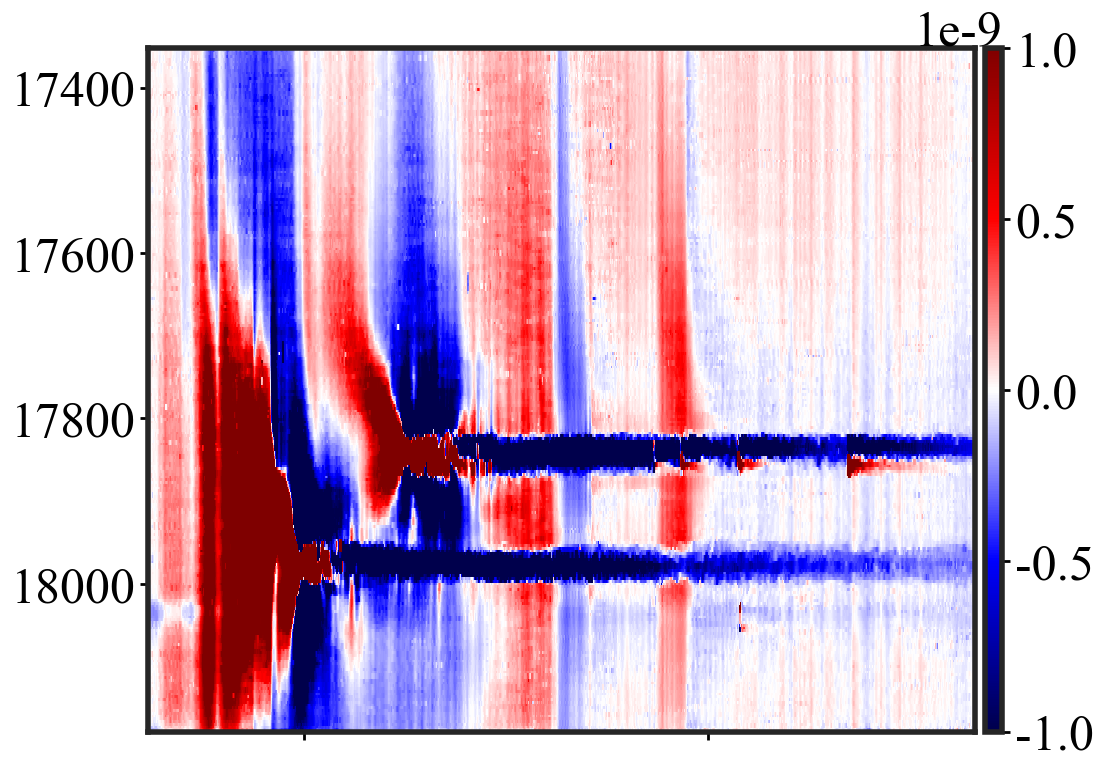

In [246]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# 画瀑布图（对接你的 Data2D_XT）
# cmap = plt.get_cmap('jet').copy()
# cmap.set_bad('white')  # NaN 分隔带显示白色
DASdata = Data2D_XT.Data2D()
DASdata.data = data_clean                 # (N_ch, M_t)
DASdata.taxis = t_sub                   # 仍然是“相对秒”
DASdata.daxis = md_sub                  # 现在是 MD（ft），含 NaN 分隔也 OK
DASdata.start_time = start_time       # 搭配 use_timestamp=True 才能显示绝对时间刻度

#adjust the size

fig, ax = plt.subplots(figsize=(10, 7), layout='constrained')  # 宽 12 英寸，高 6 英寸

# DASdata.plot_waterfall(timescale='second',use_timestamp=True,timefmt = '%m/%d\n%H:%M:%S.{ms}')
DASdata.plot_waterfall(timescale='second', use_timestamp=True, cmap=plt.get_cmap('seismic'), xtickN=5, interpolation='nearest')#interpolation='nearest' 或 'bilinear' #antialiased

ax = plt.gca()
im = ax.images[-1]
im.set_norm(TwoSlopeNorm(vmin=-1e-9, vcenter=0, vmax=1e-9))  # 以 0 为中心
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%",pad=0.1)  # 调整 3.5% 为你想要的宽度
cbar = fig.colorbar(im,cax=cax, ax=ax) # pad 调整颜色条与图的距离pad 数值越大越远（相对于轴宽度的比例）

# cbar.set_label(r'Strain change, $\mu\varepsilon$', rotation=90, labelpad=10)
# plt.clim(-1e-8, 1e-8)
cbar.set_ticks([-1e-9, -0.5e-9, 0, 0.5e-9, 1e-9])                 # 或 cbar.ax.yaxis.set_major_locator(FixedLocator([...]))
# cbar.set_ticklabels([r'$-1$', r'$-0.5$', r'$0$', r'$0.5$', r'$1$'])


# ax.set_ylabel("Measured Depth (ft)", fontweight='bold')
# ax.set_xlabel("Date",     fontweight='bold')

#S6
# # X 轴
ax.set_xticks([datetime.datetime(2019,4,1,19,20,00),datetime.datetime(2019,4,1,22,45,00)])                     # 位置（数据坐标）
# ax.set_xticklabels(['2019-04-01','2019-04-01'])     # 文本（与上面位置一一对应）

# ax.set_yticks([17400, 17600, 17800,18000])                     # 位置（数据坐标）
# ax.set_yticklabels(['17400', '17600', '17800', '18000'])     # 文本（与上面位置一一对应）


# S22
# ax.set_xticks([start_time + timedelta(minutes=150), datetime.datetime(2019,4,1,17,6,27)+ timedelta(minutes=40)])                     # 位置（数据坐标）
# ax.set_xticklabels(['2019-04-07','2019-04-07'])     # 文本（与上面位置一一对应）
ax.set_xticklabels(['','']) 
# ax.set_yticks([13600, 13800, 14000, 14200, 14400])                     # 位置（数据坐标）
# ax.set_yticklabels(['13600', '13800', '14000', '14200', '14400'])     # 文本（与上面位置一一对应/）




# 均匀间隔
# ax.xaxis.set_major_locator(MultipleLocator(3600))     # 每 3600 秒一个大刻度
# ax.yaxis.set_major_locator(MultipleLocator(5000))     # 每 2000 ft 一个大刻度

# # 控制刻度文本格式（自定义函数）
# ax.xaxis.set_major_formatter(FuncFormatter(lambda v, pos: f'{v/3600:.1f} h'))
# ax.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f'{v:.0f}'))






# plt.tight_layout()
plt.savefig('waterfall_HFTS2_S6_v2.png', dpi=600, bbox_inches='tight', pad_inches=0.05)
# plt.savefig('waterfall_HFTS2_S22.png')



# S22

## data pre_processing and axes calibration 

In [215]:
# import packages
import h5py # read h5

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib import rc
from cycler import cycler
from depth_and_time_cut import subset_dstrain_by_time_ranges, subset_dstrain_by_md_ranges
from matplotlib.colors import TwoSlopeNorm
from matplotlib.ticker import MultipleLocator, FuncFormatter, MaxNLocator, ScalarFormatter, FixedLocator, LogFormatter

import numpy as np
import pandas as pd


# download and install Dr. Jin's python package, click the url below for more details
# !git clone https://github.com/jinwar/jin_pylib

from jin_pylib import gjsignal
from jin_pylib import Data2D_XT


In [216]:
# Read h5 files
# f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 3 (refrac)/Neubrex_DSS_strain/Zgabay A14H - refrac - strain change.h5','r')
# merged_data = h5py.File('C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/stage6/merged_stage6_preserve_time.h5','r')
merged_data = h5py.File('C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/stage22/merged_stage22_preserve_time.h5','r')
print(list(merged_data.keys()))

['Acquisition']


In [217]:
# Assign variables
pchange = (merged_data['Acquisition']['Raw[0]']['RawData'])
# depth = (f1['depth'])
time_relative = (merged_data['Acquisition']['Raw[0]']['RawDataTime'])

# use panda package
print(pd.DataFrame(pchange))
print(pd.DataFrame(time_relative))

        0       1       2       3       4       5      6       7       8     \
0     -11933     303    4010   -3881   10919   -2240  -2492    5646   21882   
1      -9218  112709  135840   23604   25881   43442 -19578   33118   84532   
2      61427 -111187 -272225 -120076   86807    4261 -35714  -13201 -235525   
3     -17842  -80489 -466769 -232599  204741  -20341 -77644  -26502 -430356   
4       6866 -113127 -514831 -219508  195350   -9196 -83294  -80521 -524252   
...      ...     ...     ...     ...     ...     ...    ...     ...     ...   
6095 -125938 -253710  -37046 -100370  189420  251166  88097  328733  359512   
6096   21972 -102141    3208  181077  -67610 -257023 -70351   55693  -64346   
6097 -126561 -140775   17005  -22210    5268   12318  -5884  135585   93290   
6098   15834   53768  132003  -96437  -43064   41247  49210  143907  -31042   
6099  -44214  -97734   83276  -13782 -165050   11235  -2991  -87606 -230814   

        9     ...    2390    2391    2392    2393  

In [218]:
start = pd.Timestamp("2019-04-07 03:31:27")
end   = pd.Timestamp("2019-04-07 09:00:27")
realtime = pd.to_datetime(time_relative, unit='us')
mask = (realtime >= start) & (realtime <= end)
t_cut = realtime[mask]

In [219]:
# convert the strain data to numpy array
pchange = np.array(pchange)
print(pchange.shape)


# convert optical phase change into strain change
def phase_to_strain(arr):
    probe_wave_length = 1550e-9
    refractive_index = 1.4682
    scalar_multi_factor = 0.78
    gauge_length = 7.1467
    stored_value = 104300.4       #stored data unit rad/10430

    return probe_wave_length/(4*np.pi*refractive_index*scalar_multi_factor*gauge_length)*(arr/stored_value)

dstrain = phase_to_strain(pchange)

print(dstrain)

(6100, 2400)


[[-1.72424957e-09  4.37817498e-11  5.79421837e-10 ... -8.29685832e-10
  -5.32172226e-09 -2.43414969e-09]
 [-1.33194775e-09  1.62857994e-08  1.96280953e-08 ...  7.27672910e-10
  -9.87141187e-09 -2.01874325e-08]
 [ 8.87584667e-09 -1.60658792e-08 -3.93349400e-08 ... -1.82900788e-09
   6.80683389e-09  4.27356116e-09]
 ...
 [-1.82873334e-08 -2.03411743e-08  2.45712427e-09 ... -1.45644398e-08
  -1.40399257e-08 -1.20873753e-08]
 [ 2.28792154e-09  7.76916542e-09  1.90736710e-08 ... -1.65469005e-08
  -2.03353946e-08 -3.74159122e-08]
 [-6.38866760e-09 -1.41219985e-08  1.20329010e-08 ... -1.67448576e-08
   9.64975774e-09 -3.08038566e-08]]


In [220]:
# Parameters
sp_resolution = 1.0209523439407349    # Spatial resolution, m
time_resolution = 10     # Time resolution, s
optical_dis_top = 327.20279999999997  # Optical distance to top, m
optical_dis_end = 6198.7121136000005  # Optical distance to bottom, m
physical_dis_top = -4.440892098500626E-15      # Physical distance to top, m
physical_dis_end = 5840.0656312500005  # Physical distance to bottom, m
kelly_bushing = 7.9248   # Kelly bushing height, m


# Convert meters to feet
def meters_to_feet(meters):
    return meters * 3.28084

sp_resolution_ft = meters_to_feet(sp_resolution)
optical_dis_top_ft = meters_to_feet(optical_dis_top)
optical_dis_end_ft = meters_to_feet(optical_dis_end)
physical_dis_top_ft = meters_to_feet(physical_dis_top)
physical_dis_end_ft = meters_to_feet(physical_dis_end)
kelly_bushing_ft = meters_to_feet(kelly_bushing)


# Compute MD (measured depth) for a range of channel counts in a vectorized way
min_channels = 0
max_channels = 6099
channels = np.arange(min_channels, max_channels + 1)
fiber_MD = channels * sp_resolution_ft 
MD = (fiber_MD - optical_dis_top_ft) * (physical_dis_end_ft - physical_dis_top_ft) / (optical_dis_end_ft - optical_dis_top_ft)  + kelly_bushing_ft

print(MD)
print(MD.shape)

[-1041.75112088 -1038.4194776  -1035.08783432 ... 19271.27796929
 19274.60961257 19277.94125585]
(6100,)


In [221]:

# ranges = [(17350, 18180)]
ranges = [(13500, 14500)]

# 已有：dstrain.shape == (N_ch, N_t)、MD.shape == (N_ch,)
# ranges 用 MD（ft）指定

# A) 推荐：严格按 MD 边界插值（边界精确）
# data_sub, md_sub, meta = subset_dstrain_by_md_ranges(
#     dstrain, MD, ranges,
#     method="interp",
#     keep_gaps=True,   # 区间之间空白隔开，瀑布图更清晰
#     gap_rows=2,
# )

# B) 若追求速度且能接受边界落到最近 channel：
data_sub, md_sub, meta = subset_dstrain_by_md_ranges(dstrain, MD, ranges, method="nearest_channel", keep_gaps=True)


In [222]:
print(data_sub.shape)
print(md_sub.shape)
print(data_sub)


(300, 2400)
(300,)
[[-1.32934686e-11  4.33482671e-13  6.37219526e-11 ...  1.33368168e-10
   7.18136291e-11  1.14439425e-10]
 [ 5.95316201e-11  2.67314314e-11  7.03686869e-11 ...  1.41170856e-10
   1.23398067e-10  1.49985004e-10]
 [ 4.26257960e-11  5.37518512e-11  2.09516624e-11 ...  1.73682057e-10
   2.48385570e-10  1.81773733e-10]
 ...
 [ 2.25410989e-11  4.72496111e-11  3.04882812e-11 ...  3.81464750e-11
   5.64972414e-11  4.79720822e-11]
 [-1.62989484e-10  1.84952606e-11  3.16442350e-11 ...  1.21375148e-11
  -6.74788024e-11 -5.34628627e-12]
 [ 7.69287247e-10  6.20891679e-10  2.68181279e-10 ...  2.64424429e-11
  -6.16990335e-11  1.87842491e-12]]


In [223]:
t_intrvl = 10  # time interval in seconds
t_axis =  t_intrvl * np.arange(dstrain.shape[-1])          # array([1, 146, 291, ...])
t_axis = t_axis.tolist() 
print(t_axis)
print(type(t_axis))
# start_time = datetime.datetime(2019,4,1,18,00,47)

start_time = datetime.datetime(2019,4,7,3,31,27)
# start_time = datetime.datetime(2019,4,7,1,51,27)
# print(start_time)


[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 

In [224]:

# 例1：用“相对秒”指定两段
# ranges_t = [(0, 3600), (7200, 7800)]   # [0, 1h] 和 [2h, 2h10m]

# 例2：用“绝对时间”指定（需要 start_time）
from datetime import timedelta
# ranges_t = [(start_time + timedelta(minutes=0), datetime.datetime(2019,4,2,1,00,47))]
ranges_t = [(start_time + timedelta(minutes=0), datetime.datetime(2019,4,7,10,6,27))]    #这个时间是文件开始的时间，里面还有29个intervals

# ranges_t = [(start_time + timedelta(minutes=5), start_time + timedelta(minutes=30)),
#             (start_time + timedelta(hours=2),  start_time + timedelta(hours=2, minutes=10))]

# A) 边界精确（推荐）
# data_tsub, t_sub, tmeta = subset_dstrain_by_time_ranges(
#     data_sub, t_axis, ranges_t,
#     start_time=start_time,
#     method="interp",
#     keep_gaps=True,
#     gap_cols=2,
#     include_endpoints=True
# )

# B) 速度优先（不插值）
data_tsub, t_sub, tmeta = subset_dstrain_by_time_ranges(
    data_sub, t_axis, ranges_t, start_time=start_time, method="nearest", keep_gaps=True
)


In [225]:
import numpy as np
import pandas as pd

# t：把你的 t_axis 统一成“相对秒”的 ndarray
t = np.asarray(t_axis, dtype=float)
dt = float(np.median(np.diff(t)))  # 估计采样间隔，应≈10

# 把你传给函数的 ranges_t（若是绝对时间）也转为“相对秒”
def to_rel_s(r, start_time):
    lo, hi = r
    lo = (pd.to_datetime(lo) - pd.to_datetime(start_time)).total_seconds()
    hi = (pd.to_datetime(hi) - pd.to_datetime(start_time)).total_seconds()
    return lo, hi

# 如果你的 ranges_t 就是相对秒，这步就不用
lo, hi = to_rel_s(ranges_t[0], start_time)

print("t[0], t[-1], dt =", t[0], t[-1], dt)
print("你给的区间(秒)   =", lo, hi)
print("左侧被裁掉列数 =", np.sum(t < lo))
print("右侧被裁掉列数 =", np.sum(t > hi))


t[0], t[-1], dt = 0.0 23990.0 10.0
你给的区间(秒)   = 0.0 23700.0
左侧被裁掉列数 = 0
右侧被裁掉列数 = 29


In [226]:
print(data_tsub.shape)

(300, 2371)


In [227]:
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view

def _rolling_median_time(x, win):
    """沿时间轴滚动中位数，忽略 NaN；边界用 edge 填充。x: (n_ch, n_t)"""
    if win < 3 or win % 2 == 0:
        raise ValueError("win 应是 >=3 的奇数")
    pad = win // 2
    xp = np.pad(x, ((0,0),(pad,pad)), mode='edge')
    # 关键修正：window_shape
    w = sliding_window_view(xp, window_shape=win, axis=1)  # (n_ch, n_t, win)
    med = np.nanmedian(w, axis=-1)
    return med

def _rolling_mean_time_nanaware(x, win):
    """沿时间轴移动平均（对 NaN 做权重归一），x: (n_ch, n_t)"""
    if win < 3 or win % 2 == 0:
        raise ValueError("win 应是 >=3 的奇数")
    kernel = np.ones(win, dtype=float)
    pad = win // 2
    x0 = np.pad(np.where(np.isfinite(x), x, 0.0), ((0,0),(pad,pad)), mode='edge')
    w0 = np.pad(np.where(np.isfinite(x), 1.0, 0.0), ((0,0),(pad,pad)), mode='edge')
    # 逐通道一维卷积
    val = np.apply_along_axis(lambda m: np.convolve(m, kernel, mode='valid'), 1, x0)
    cnt = np.apply_along_axis(lambda m: np.convolve(m, kernel, mode='valid'), 1, w0)
    out = val / np.maximum(cnt, 1e-12)
    # 原位是 NaN 的位置保持 NaN（避免填补 gap）
    out[~np.isfinite(x)] = np.nan
    return out

def _median_depth_nanaware(x, win=3):
    """沿深度（通道轴=0）做极轻的中值滤波，去椒盐点；对 NaN 友好。"""
    if win < 3 or win % 2 == 0:
        raise ValueError("win 应是 >=3 的奇数")
    pad = win // 2
    xp = np.pad(x, ((pad,pad),(0,0)), mode='edge')
    # 关键修正：window_shape，且不要 moveaxis
    w = sliding_window_view(xp, window_shape=win, axis=0)  # (n_ch, n_t, win)
    med = np.nanmedian(w, axis=-1)                         # 沿窗口轴取中位
    med[~np.isfinite(x)] = np.nan
    return med

def despike_mad_time(x, win=5, k=6.0):
    """
    MAD 去尖峰（沿时间轴）。win:奇数窗口；k: 阈值倍数（常用 5~8）。
    只替换超过 k*MAD 的离群点为局部中位数。
    """
    med = _rolling_median_time(x, win)
    dev = x - med
    mad = _rolling_median_time(np.abs(dev), win)
    sigma = 1.4826 * mad
    mask = np.isfinite(x) & np.isfinite(sigma) & (np.abs(dev) > k * sigma)
    out = x.copy()
    out[mask] = med[mask]
    return out

def denoise_pipeline(data_mu_eps,
                     t_win_despike=5,    # 5*10s=50s 局部去尖峰
                     mad_k=6.0,
                     t_win_smooth=7,     # 7*10s=70s 轻平滑
                     use_depth_median=True,
                     depth_win=3):
    """
    data_mu_eps: (n_ch, n_t) 单位 μɛ，含 NaN 间隔（来自 keep_gaps）。
    返回：去噪后的 (n_ch, n_t)
    """
    # 记录哪些列/行是 gap（全 NaN），用于保护不跨 gap 平滑
    col_gap = np.all(~np.isfinite(data_mu_eps), axis=0)
    row_gap = np.all(~np.isfinite(data_mu_eps), axis=1)

    y = data_mu_eps.copy()
    # 1) MAD 去尖峰（时间轴）
    y = despike_mad_time(y, win=t_win_despike, k=mad_k)
    # 2) 移动平均轻平滑（时间轴）
    y = _rolling_mean_time_nanaware(y, win=t_win_smooth)
    # 3) 可选：沿深度 3 点中值（极轻）
    if use_depth_median:
        y = _median_depth_nanaware(y, win=depth_win)
    # 恢复 gap：保持 gap 位置仍为 NaN
    y[:, col_gap] = np.nan
    y[row_gap, :] = np.nan
    return y


In [228]:
# 2) 去噪流水线
data_clean = denoise_pipeline(
    data_tsub,
    t_win_despike=5,   # 50 s 局部中位去尖峰
    mad_k=6.0,
    t_win_smooth=7,    # 70 s 轻平滑；若你想更锐利，用 5
    use_depth_median=True,
    depth_win=3
)

## Waterfall plot

In [229]:
# Figure format
rc = {'axes.facecolor':'white',
      'figure.figsize': (12, 6),
      'savefig.dpi': 600,
#       'axes.grid' : False,
      'axes.edgecolor' : '0.15',
      'font.family':'Times New Roman',
      'font.serif': ['Times New Roman', 'Times', 'STIXGeneral'],  # 备选

      # —— 数学字体（$...$ 内）——
      'mathtext.fontset': 'stix',     # 关键：让 μ、ε 等用 STIX（Times 风格）
      'axes.unicode_minus': False,    # 让负号显示为正常的连字符
      
      'axes.labelsize': 36,         # X、Y 轴标题字体
      'axes.labelweight': 'bold',   # X、Y 轴标题加粗
      'xtick.labelsize': 36,        # X轴刻度文字
      'ytick.labelsize': 36,        # Y轴刻度文字
      'legend.fontsize': 36,       # 图例字体

      # 线宽与颜色顺序
      'lines.linewidth': 2.25,      # 所有线条默认 2.25 pt
      'axes.prop_cycle': cycler('color', list(('k', 'r', 'b', 'g', 'm', 'c', 'y'))),

      # 刻度朝外 & 粗细
      'xtick.direction': 'out',
      'ytick.direction': 'out',
      'xtick.major.size': 6,
      'ytick.major.size': 6,
      'xtick.major.width': 2.0,
      'ytick.major.width': 2.0,

      # 坐标轴（内框）线宽
      'axes.linewidth': 4,
      } 
# lack of font size
plt.rcParams.update(rc)

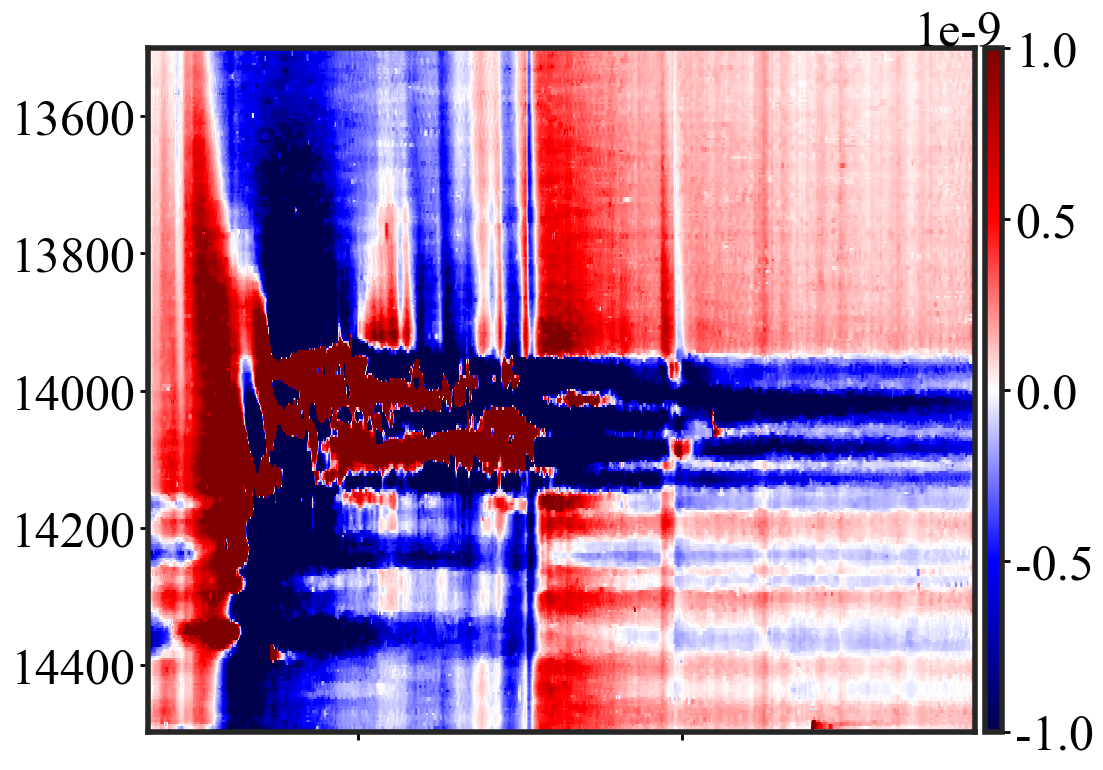

In [230]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# 画瀑布图（对接你的 Data2D_XT）
# cmap = plt.get_cmap('jet').copy()
# cmap.set_bad('white')  # NaN 分隔带显示白色
DASdata = Data2D_XT.Data2D()
DASdata.data = data_clean                 # (N_ch, M_t)
DASdata.taxis = t_sub                   # 仍然是“相对秒”
DASdata.daxis = md_sub                  # 现在是 MD（ft），含 NaN 分隔也 OK
DASdata.start_time = start_time       # 搭配 use_timestamp=True 才能显示绝对时间刻度

#adjust the size

fig, ax = plt.subplots(figsize=(10, 7), layout='constrained')  # 宽 12 英寸，高 6 英寸

# DASdata.plot_waterfall(timescale='second',use_timestamp=True,timefmt = '%m/%d\n%H:%M:%S.{ms}')
DASdata.plot_waterfall(timescale='second', use_timestamp=True, cmap=plt.get_cmap('seismic'), xtickN=5, interpolation='nearest')#interpolation='nearest' 或 'bilinear' #antialiased

ax = plt.gca()
im = ax.images[-1]
im.set_norm(TwoSlopeNorm(vmin=-1e-9, vcenter=0, vmax=1e-9))  # 以 0 为中心
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%",pad=0.1)  # 调整 3.5% 为你想要的宽度
cbar = fig.colorbar(im,cax=cax, ax=ax) # pad 调整颜色条与图的距离pad 数值越大越远（相对于轴宽度的比例）

# cbar.set_label(r'Strain change, $\mu\varepsilon$', rotation=90, labelpad=10)
# plt.clim(-1e-8, 1e-8)
cbar.set_ticks([-1e-9, -0.5e-9, 0, 0.5e-9, 1e-9])                 # 或 cbar.ax.yaxis.set_major_locator(FixedLocator([...]))
# cbar.set_ticklabels([r'$-1$', r'$-0.5$', r'$0$', r'$0.5$', r'$1$'])


# ax.set_ylabel("Measured Depth (ft)", fontweight='bold')
# ax.set_xlabel("Date",     fontweight='bold')

#S6
# # X 轴
# ax.set_xticks([datetime.datetime(2019,4,1,19,00,00),datetime.datetime(2019,4,1,23,00,00)])                     # 位置（数据坐标）
# ax.set_xticklabels(['2019-04-01','2019-04-01'])     # 文本（与上面位置一一对应）

# ax.set_yticks([17400, 17600, 17800,18000])                     # 位置（数据坐标）
# ax.set_yticklabels(['17400', '17600', '17800', '18000'])     # 文本（与上面位置一一对应）


# S22
ax.set_xticks([start_time + timedelta(minutes=100), datetime.datetime(2019,4,7,7,6,27)+ timedelta(minutes=40)])                     # 位置（数据坐标）
# ax.set_xticklabels(['2019-04-07','2019-04-07'])     # 文本（与上面位置一一对应）
ax.set_xticklabels(['','']) 
ax.set_yticks([13600, 13800, 14000, 14200, 14400])                     # 位置（数据坐标）
ax.set_yticklabels(['13600', '13800', '14000', '14200', '14400'])     # 文本（与上面位置一一对应/）




# 均匀间隔
# ax.xaxis.set_major_locator(MultipleLocator(3600))     # 每 3600 秒一个大刻度
# ax.yaxis.set_major_locator(MultipleLocator(5000))     # 每 2000 ft 一个大刻度

# # 控制刻度文本格式（自定义函数）
# ax.xaxis.set_major_formatter(FuncFormatter(lambda v, pos: f'{v/3600:.1f} h'))
# ax.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f'{v:.0f}'))






# plt.tight_layout()
plt.savefig('waterfall_HFTS2_S22_v2.png', dpi=600, bbox_inches='tight', pad_inches=0.05)
# plt.savefig('waterfall_HFTS2_S22.png')

